In [31]:
#advanced_tuning_of_parameters_exercise.ipynb 
# IMPORT PACKAGES
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import load_iris

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [66]:
diabetes=pd.read_csv("pima-indians-diabetes.csv",sep=';')

In [67]:
diabetes.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [68]:
diabetes.groupby('class').size()

class
0    500
1    268
dtype: int64

C:\Users\shjk\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\shjk\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\shjk\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\shjk\anaconda3\lib\site-packages\pandas\plotting\_matplotli

class
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

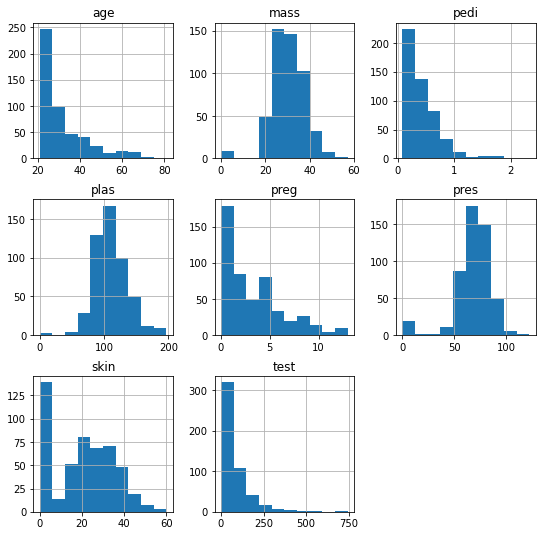

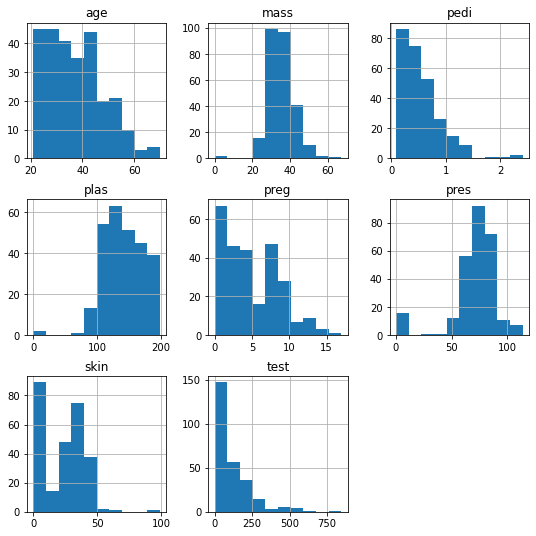

In [72]:
diabetes.groupby('class').hist(figsize=(9, 9))

In [73]:
diabetes.isnull().sum()
diabetes.isna().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [86]:
feature_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
X = diabetes[feature_names]
y = diabetes['class']

In [87]:
# This dataset is way too high-dimensional. Better do PCA:
pca = PCA(n_components=2)

# Maybe some of the original features were good, too?
selection = SelectKBest(k=3)

In [88]:
combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

In [89]:
svm = SVC(kernel="linear")

In [90]:
# create our pipeline from FeatureUnion 
pipeline = Pipeline([("features", combined_features), ("svm", svm)])

# set up our parameters grid
param_grid = {"features__pca__n_components": [1, 2, 3],
                  "features__univ_select__k": [1, 2, 3],
                  "svm__C":[0.1, 1, 10]}

# create a Grid Search object
grid_search = GridSearchCV(pipeline, param_grid, verbose=10, refit=True)    

# fit the model and tune parameters
grid_search.fit(X, y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1
[CV 1/5; 1/27] END features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1; total time=   0.3s
[CV 2/5; 1/27] START features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1
[CV 2/5; 1/27] END features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1; total time=   0.2s
[CV 3/5; 1/27] START features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1
[CV 3/5; 1/27] END features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1; total time=   0.2s
[CV 4/5; 1/27] START features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1
[CV 4/5; 1/27] END features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1; total time=   0.6s
[CV 5/5; 1/27] START features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1
[CV 5/5; 1/27] END features__pca__n_components=

[CV 2/5; 9/27] END features__pca__n_components=1, features__univ_select__k=3, svm__C=10; total time=  19.7s
[CV 3/5; 9/27] START features__pca__n_components=1, features__univ_select__k=3, svm__C=10
[CV 3/5; 9/27] END features__pca__n_components=1, features__univ_select__k=3, svm__C=10; total time=  30.8s
[CV 4/5; 9/27] START features__pca__n_components=1, features__univ_select__k=3, svm__C=10
[CV 4/5; 9/27] END features__pca__n_components=1, features__univ_select__k=3, svm__C=10; total time=  16.8s
[CV 5/5; 9/27] START features__pca__n_components=1, features__univ_select__k=3, svm__C=10
[CV 5/5; 9/27] END features__pca__n_components=1, features__univ_select__k=3, svm__C=10; total time=  27.8s
[CV 1/5; 10/27] START features__pca__n_components=2, features__univ_select__k=1, svm__C=0.1
[CV 1/5; 10/27] END features__pca__n_components=2, features__univ_select__k=1, svm__C=0.1; total time=   0.2s
[CV 2/5; 10/27] START features__pca__n_components=2, features__univ_select__k=1, svm__C=0.1
[CV 

[CV 3/5; 17/27] END features__pca__n_components=2, features__univ_select__k=3, svm__C=1; total time=   3.3s
[CV 4/5; 17/27] START features__pca__n_components=2, features__univ_select__k=3, svm__C=1
[CV 4/5; 17/27] END features__pca__n_components=2, features__univ_select__k=3, svm__C=1; total time=   2.9s
[CV 5/5; 17/27] START features__pca__n_components=2, features__univ_select__k=3, svm__C=1
[CV 5/5; 17/27] END features__pca__n_components=2, features__univ_select__k=3, svm__C=1; total time=   2.1s
[CV 1/5; 18/27] START features__pca__n_components=2, features__univ_select__k=3, svm__C=10
[CV 1/5; 18/27] END features__pca__n_components=2, features__univ_select__k=3, svm__C=10; total time=  20.1s
[CV 2/5; 18/27] START features__pca__n_components=2, features__univ_select__k=3, svm__C=10
[CV 2/5; 18/27] END features__pca__n_components=2, features__univ_select__k=3, svm__C=10; total time=  27.4s
[CV 3/5; 18/27] START features__pca__n_components=2, features__univ_select__k=3, svm__C=10
[CV 3

[CV 4/5; 25/27] END features__pca__n_components=3, features__univ_select__k=3, svm__C=0.1; total time=   0.6s
[CV 5/5; 25/27] START features__pca__n_components=3, features__univ_select__k=3, svm__C=0.1
[CV 5/5; 25/27] END features__pca__n_components=3, features__univ_select__k=3, svm__C=0.1; total time=   0.2s
[CV 1/5; 26/27] START features__pca__n_components=3, features__univ_select__k=3, svm__C=1
[CV 1/5; 26/27] END features__pca__n_components=3, features__univ_select__k=3, svm__C=1; total time=   3.4s
[CV 2/5; 26/27] START features__pca__n_components=3, features__univ_select__k=3, svm__C=1
[CV 2/5; 26/27] END features__pca__n_components=3, features__univ_select__k=3, svm__C=1; total time=   2.7s
[CV 3/5; 26/27] START features__pca__n_components=3, features__univ_select__k=3, svm__C=1
[CV 3/5; 26/27] END features__pca__n_components=3, features__univ_select__k=3, svm__C=1; total time=   2.6s
[CV 4/5; 26/27] START features__pca__n_components=3, features__univ_select__k=3, svm__C=1
[CV 

GridSearchCV(estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('pca',
                                                                        PCA(n_components=2)),
                                                                       ('univ_select',
                                                                        SelectKBest(k=3))])),
                                       ('svm', SVC(kernel='linear'))]),
             param_grid={'features__pca__n_components': [1, 2, 3],
                         'features__univ_select__k': [1, 2, 3],
                         'svm__C': [0.1, 1, 10]},
             verbose=10)

In [94]:
print(grid_search.best_params_)

{'features__pca__n_components': 3, 'features__univ_select__k': 3, 'svm__C': 0.1}
